In [2]:
import matplotlib.pyplot as plt
# %matplotlib inline
import numpy as np
from astropy.io import fits
import tqdm
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
import nmmn.plots
import vorbin
wolfram=nmmn.plots.wolframcmap() # for Mathematica's cmap
parula=nmmn.plots.parulacmap() # for MATLAB's cmap
turbo=nmmn.plots.turbocmap() # Turbo
import warnings
warnings.filterwarnings('ignore')
import galpy
from galpy.util import coords
from galpy.potential import IsochronePotential
from galpy.actionAngle import actionAngleIsochrone
# from galpy.potential import MWPotential2014
from galpy.actionAngle import actionAngleStaeckel
from galpy.actionAngle import estimateDeltaStaeckel
from astropy.io import fits
import tqdm
from galpy.orbit import Orbit
from galpy.potential.mwpotentials import McMillan17
from galpy.util.conversion import get_physical
from galpy.actionAngle import UnboundError


In [3]:
import h5py
f = h5py.File("/Users/dhortadarrington/Documents/Projects/mw-bar/data/AllClassifications_APOGEE_all_feh8_SNRc.h5","r")
# f.keys() # this would list all the APOGEE IDs, including doubles for half-integer bins
median_knot_probability = []
median_bar_probability = []
median_disc_probability = []
std_knot_probability = []
std_bar_probability = []
std_disc_probability = []
all_knot_probability = []
all_bar_probability = []
all_disc_probability = []
RxyzL = []


for key in tqdm.tqdm_notebook(f.keys()):
    median_knot_probability.append(np.nanmedian(f[key][:,2]))
    median_bar_probability.append(np.nanmedian(f[key][:,1]))
    median_disc_probability.append(np.nanmedian(f[key][:,0]))
    std_knot_probability.append(np.nanstd(f[key][:,2]))
    std_bar_probability.append(np.nanstd(f[key][:,1]))
    std_disc_probability.append(np.nanstd(f[key][:,0]))
    all_knot_probability.append((f[key][:,2]))
    all_bar_probability.append((f[key][:,1]))
    all_disc_probability.append((f[key][:,0]))
    RxyzL.append(f[key][:,3][:7])
f.close() # don't forget to close the file!


  0%|          | 0/32489 [00:00<?, ?it/s]

In [4]:
mask_knot = (np.array(median_knot_probability)>0.5)&(np.array(std_knot_probability)<0.15)
mask_bar = (np.array(median_bar_probability)>0.85)&(np.array(std_bar_probability)<0.15)
mask_disc = (np.array(median_disc_probability)>0.85)&(np.array(std_disc_probability)<0.15)

In [5]:
RxyzL_ = np.array(RxyzL)

In [6]:
R = RxyzL_[:,0]
x = RxyzL_[:,1]
y = RxyzL_[:,2]
z = RxyzL_[:,3]
Lx = RxyzL_[:,4]
Ly = RxyzL_[:,5]
Lz = RxyzL_[:,6]

In [7]:
print(len(RxyzL_[mask_knot]))
print(len(RxyzL_[mask_bar]))
print(len(RxyzL_[mask_disc]))

636
3339
20514


In [8]:
import h5py
f = h5py.File("/Users/dhortadarrington/Documents/Projects/mw-bar/data/AllClassifications_APOGEE_all_feh8_SNRc.h5","r")
apo_ids = []
for key in tqdm.tqdm_notebook(f.keys()):
    new_key = key.replace("*", "")
    apo_ids.append(new_key)
f.close() # don't forget to close the file!


  0%|          | 0/32489 [00:00<?, ?it/s]

In [9]:
import h5py
f = h5py.File("/Users/dhortadarrington/Documents/Projects/mw-bar/data/AllClassifications_APOGEE_all_feh8_SNRc.h5","r")
apo_ids2 = []
for key in tqdm.tqdm_notebook(f.keys()):
    if '*' in key:
        pass
    else:
        apo_ids2.append(key)
f.close() # don't forget to close the file!
     

  0%|          | 0/32489 [00:00<?, ?it/s]

In [10]:
import h5py
f = h5py.File("/Users/dhortadarrington/Documents/Projects/mw-bar/data/AllClassifications_APOGEE_all_feh8_SNRc.h5","r")
apo_ids3 = []
for key in tqdm.tqdm_notebook(f.keys()):
    apo_ids3.append(key)
f.close() # don't forget to close the file!
     


  0%|          | 0/32489 [00:00<?, ?it/s]

In [11]:
print(len(apo_ids3))
print(len(apo_ids2))
# print(len(data_all))

32489
18271


In [12]:
mask_u = np.isin(apo_ids3,apo_ids2)


In [13]:
path = '/Users/dhortadarrington/Documents/Projects/mw-bar/data/table_centroids.fits'
tb = fits.open(path)
data = tb[1].data 

In [14]:
mask_cen_knot = np.where(data['comp']=='knot')
mask_cen_bar = np.where(data['comp']=='bar')
mask_cen_disc = np.where(data['comp']=='disc')


(-1500.0, 500.0)

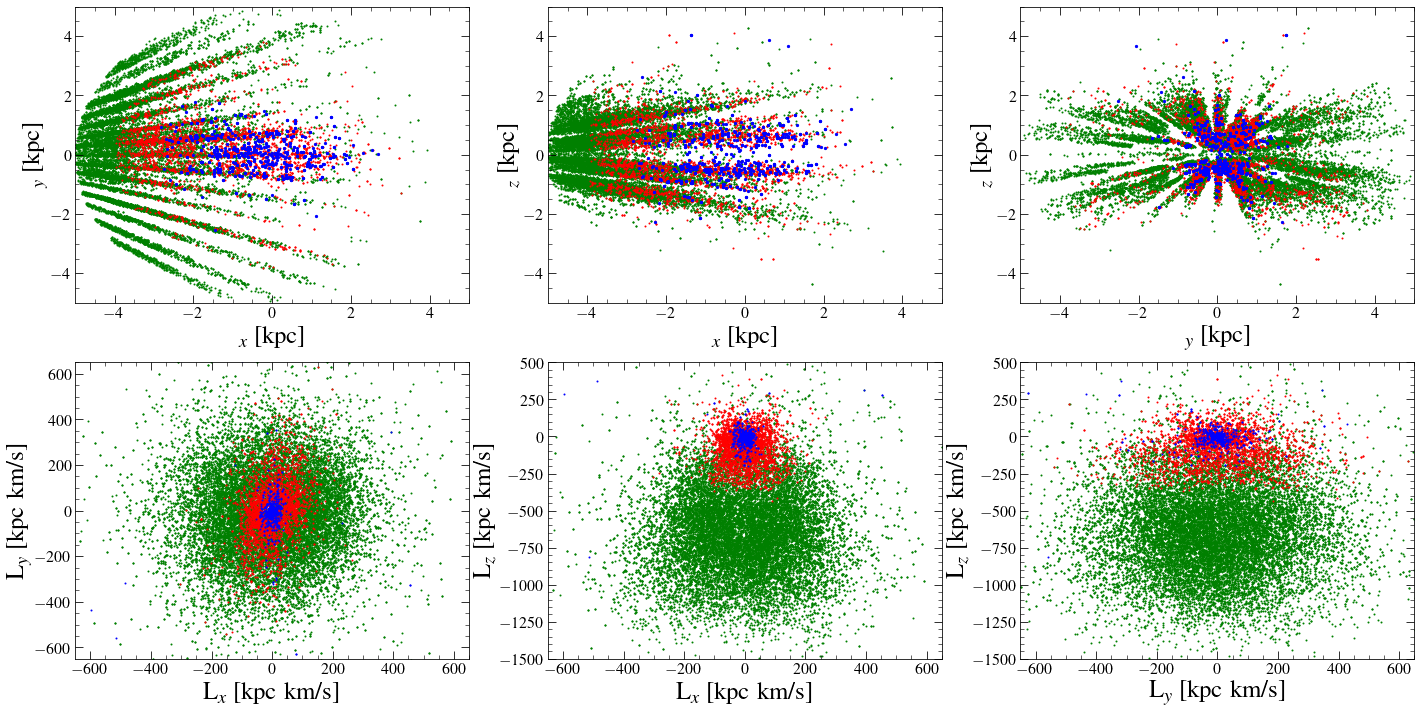

In [15]:
plt.figure(figsize=(24,12),facecolor='white')

plt.subplot(2,3,1)
plt.scatter(x[mask_disc],y[mask_disc],s=1,c='g')
plt.scatter(x[mask_bar],y[mask_bar],s=1,c='r')
plt.scatter(x[mask_knot],y[mask_knot],s=5,c='b')
plt.xlabel(r'$_{x}$ [kpc]',fontsize=25)
plt.ylabel(r'$_{y}$ [kpc]',fontsize=25)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-5,5)
plt.ylim(-5,5)

plt.subplot(2,3,2)
plt.scatter(x[mask_disc],z[mask_disc],s=1,c='g')
plt.scatter(x[mask_bar],z[mask_bar],s=1,c='r')
plt.scatter(x[mask_knot],z[mask_knot],s=5,c='b')
plt.xlabel(r'$_{x}$ [kpc]',fontsize=25)
plt.ylabel(r'$_{z}$ [kpc]',fontsize=25)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-5,5)
plt.ylim(-5,5)

plt.subplot(2,3,3)
plt.scatter(y[mask_disc],z[mask_disc],s=1,c='g')
plt.scatter(y[mask_bar],z[mask_bar],s=1,c='r')
plt.scatter(y[mask_knot],z[mask_knot],s=5,c='b')
plt.xlabel(r'$_{y}$ [kpc]',fontsize=25)
plt.ylabel(r'$_{z}$ [kpc]',fontsize=25)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-5,5)
plt.ylim(-5,5)


plt.subplot(2,3,4)
plt.scatter(Lx[mask_disc],Ly[mask_disc],s=1,c='g')
plt.scatter(Lx[mask_bar],Ly[mask_bar],s=1,c='r')
plt.scatter(Lx[mask_knot],Ly[mask_knot],s=1,c='b')
plt.xlabel(r'L$_{x}$ [kpc km/s]',fontsize=25)
plt.ylabel(r'L$_{y}$ [kpc km/s]',fontsize=25)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-650,650)
plt.ylim(-650,650)

plt.subplot(2,3,5)
plt.scatter(Lx[mask_disc],Lz[mask_disc],s=1,c='g')
plt.scatter(Lx[mask_bar],Lz[mask_bar],s=1,c='r')
plt.scatter(Lx[mask_knot],Lz[mask_knot],s=1,c='b')
plt.xlabel(r'L$_{x}$ [kpc km/s]',fontsize=25)
plt.ylabel(r'L$_{z}$ [kpc km/s]',fontsize=25)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-650,650)
plt.ylim(-1500,500)

plt.subplot(2,3,6)
plt.scatter(Ly[mask_disc],Lz[mask_disc],s=1,c='g')
plt.scatter(Ly[mask_bar],Lz[mask_bar],s=1,c='r')
plt.scatter(Ly[mask_knot],Lz[mask_knot],s=1,c='b')
plt.xlabel(r'L$_{y}$ [kpc km/s]',fontsize=25)
plt.ylabel(r'L$_{z}$ [kpc km/s]',fontsize=25)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-650,650)
plt.ylim(-1500,500)


(-1500.0, 500.0)

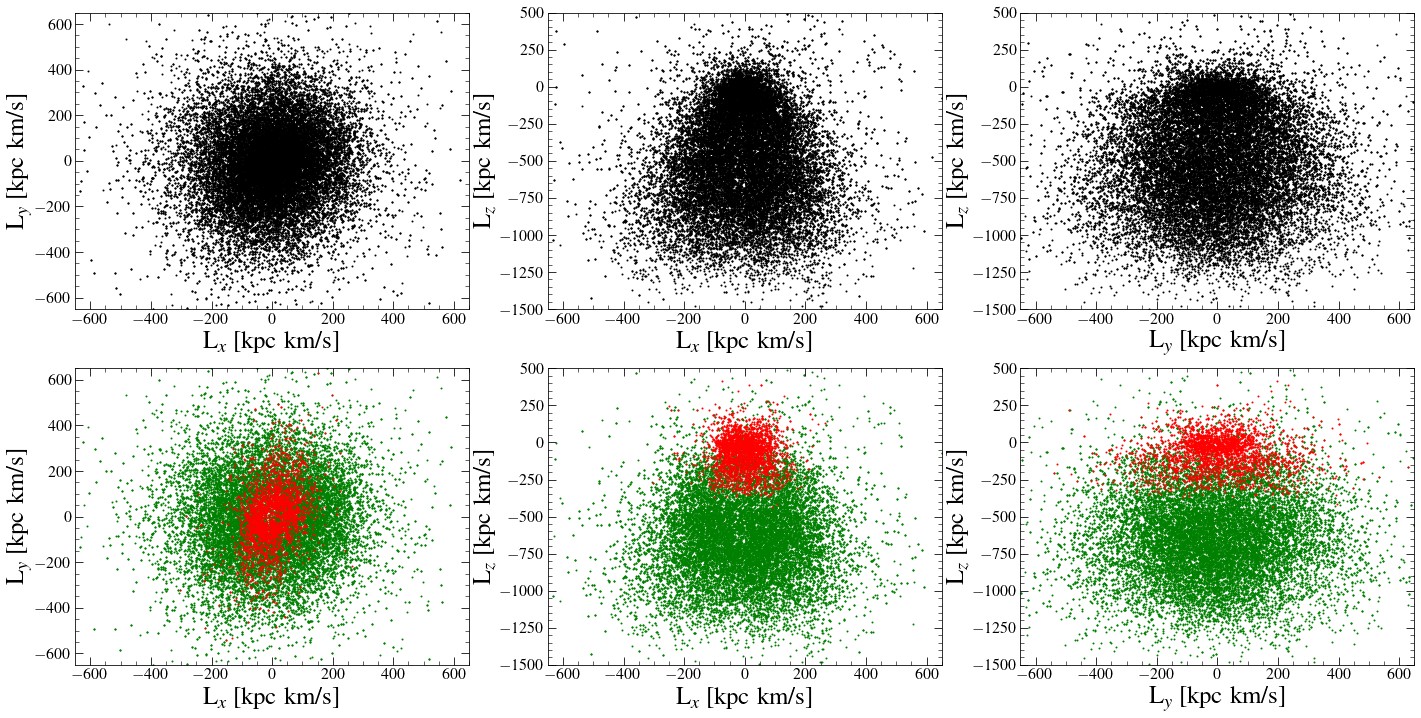

In [16]:
plt.figure(figsize=(24,12),facecolor='white')

plt.subplot(2,3,1)
plt.scatter(Lx,Ly,s=1,c='k')
plt.xlabel(r'L$_{x}$ [kpc km/s]',fontsize=25)
plt.ylabel(r'L$_{y}$ [kpc km/s]',fontsize=25)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-650,650)
plt.ylim(-650,650)

plt.subplot(2,3,2)
plt.scatter(Lx,Lz,s=1,c='k')
plt.xlabel(r'L$_{x}$ [kpc km/s]',fontsize=25)
plt.ylabel(r'L$_{z}$ [kpc km/s]',fontsize=25)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-650,650)
plt.ylim(-1500,500)

plt.subplot(2,3,3)
plt.scatter(Ly,Lz,s=1,c='k')
plt.xlabel(r'L$_{y}$ [kpc km/s]',fontsize=25)
plt.ylabel(r'L$_{z}$ [kpc km/s]',fontsize=25)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-650,650)
plt.ylim(-1500,500)




plt.subplot(2,3,4)
plt.scatter(Lx[mask_disc],Ly[mask_disc],s=1,c='g')
plt.scatter(Lx[mask_bar],Ly[mask_bar],s=1,c='r')
# plt.scatter(Lx[mask_knot],Ly[mask_knot],s=1,c='b')
plt.xlabel(r'L$_{x}$ [kpc km/s]',fontsize=25)
plt.ylabel(r'L$_{y}$ [kpc km/s]',fontsize=25)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-650,650)
plt.ylim(-650,650)

plt.subplot(2,3,5)
plt.scatter(Lx[mask_disc],Lz[mask_disc],s=1,c='g')
plt.scatter(Lx[mask_bar],Lz[mask_bar],s=1,c='r')
# plt.scatter(Lx[mask_knot],Lz[mask_knot],s=1,c='b')
plt.xlabel(r'L$_{x}$ [kpc km/s]',fontsize=25)
plt.ylabel(r'L$_{z}$ [kpc km/s]',fontsize=25)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-650,650)
plt.ylim(-1500,500)

plt.subplot(2,3,6)
plt.scatter(Ly[mask_disc],Lz[mask_disc],s=1,c='g')
plt.scatter(Ly[mask_bar],Lz[mask_bar],s=1,c='r')
# plt.scatter(Ly[mask_knot],Lz[mask_knot],s=1,c='b')
plt.xlabel(r'L$_{y}$ [kpc km/s]',fontsize=25)
plt.ylabel(r'L$_{z}$ [kpc km/s]',fontsize=25)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-650,650)
plt.ylim(-1500,500)





In [ ]:
plt.figure(figsize=(28,6),facecolor='white')

plt.subplot(1,3,1)
plt.scatter(Lx,Ly,s=1,c='k')
plt.xlabel(r'L$_{x}$ [kpc km/s]',fontsize=25)
plt.ylabel(r'L$_{y}$ [kpc km/s]',fontsize=25)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-650,650)
plt.ylim(-650,650)

plt.subplot(1,3,2)
plt.scatter(Lx,Lz,s=1,c='k')
plt.xlabel(r'L$_{x}$ [kpc km/s]',fontsize=25)
plt.ylabel(r'L$_{z}$ [kpc km/s]',fontsize=25)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-650,650)
plt.ylim(-1500,500)

plt.subplot(1,3,3)
plt.scatter(Ly,Lz,s=1,c='k')
plt.xlabel(r'L$_{y}$ [kpc km/s]',fontsize=25)
plt.ylabel(r'L$_{z}$ [kpc km/s]',fontsize=25)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-650,650)
plt.ylim(-1500,500)




# plt.subplot(2,3,4)
# plt.scatter(Lx[mask_disc],Ly[mask_disc],s=1,c='g')
# plt.scatter(Lx[mask_bar],Ly[mask_bar],s=1,c='r')
# # plt.scatter(Lx[mask_knot],Ly[mask_knot],s=1,c='b')
# plt.xlabel(r'L$_{x}$ [kpc km/s]',fontsize=25)
# plt.ylabel(r'L$_{y}$ [kpc km/s]',fontsize=25)
# plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
# plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
# plt.minorticks_on()
# plt.xlim(-650,650)
# plt.ylim(-650,650)

# plt.subplot(2,3,5)
# plt.scatter(Lx[mask_disc],Lz[mask_disc],s=1,c='g')
# plt.scatter(Lx[mask_bar],Lz[mask_bar],s=1,c='r')
# # plt.scatter(Lx[mask_knot],Lz[mask_knot],s=1,c='b')
# plt.xlabel(r'L$_{x}$ [kpc km/s]',fontsize=25)
# plt.ylabel(r'L$_{z}$ [kpc km/s]',fontsize=25)
# plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
# plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
# plt.minorticks_on()
# plt.xlim(-650,650)
# plt.ylim(-1500,500)

# plt.subplot(2,3,6)
# plt.scatter(Ly[mask_disc],Lz[mask_disc],s=1,c='g')
# plt.scatter(Ly[mask_bar],Lz[mask_bar],s=1,c='r')
# # plt.scatter(Ly[mask_knot],Lz[mask_knot],s=1,c='b')
# plt.xlabel(r'L$_{y}$ [kpc km/s]',fontsize=25)
# plt.ylabel(r'L$_{z}$ [kpc km/s]',fontsize=25)
# plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
# plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
# plt.minorticks_on()
# plt.xlim(-650,650)
# plt.ylim(-1500,500)





In [ ]:

plt.subplot(1,3,4)
plt.scatter(Lx,Ly,s=1,c='k')
plt.xlabel(r'L$_{x}$ [kpc km/s]',fontsize=25)
plt.ylabel(r'L$_{y}$ [kpc km/s]',fontsize=25)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-650,650)
plt.ylim(-650,650)

plt.subplot(1,3,5)
plt.scatter(Lx,Lz,s=1,c='k')
plt.xlabel(r'L$_{x}$ [kpc km/s]',fontsize=25)
plt.ylabel(r'L$_{z}$ [kpc km/s]',fontsize=25)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-650,650)
plt.ylim(-1500,500)

plt.subplot(1,3,6)
plt.scatter(Ly,Lz,s=1,c='k')
plt.xlabel(r'L$_{y}$ [kpc km/s]',fontsize=25)
plt.ylabel(r'L$_{z}$ [kpc km/s]',fontsize=25)
plt.tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
plt.tick_params(which='minor', length=4, direction='in',top=True,right=True)
plt.minorticks_on()
plt.xlim(-650,650)
plt.ylim(-1500,500)




In [17]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
#     if x.size != y.size:
#         raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

In [18]:
path_all = '/Users/dhortadarrington/Documents/Projects/mw-bar/data/4Mike-innergal-bar-gaiadists'
tb_all = fits.open(path_all)
data_all = tb_all[1].data 
print(len(data_all))

21742


In [24]:
def dat_to_galcen(dat,
                  return_rphiz =True,
                  verbose =False,
                  ro = 8.275,  # GRAVITY 2018 value 
                  vo = 220.,   # GRAVITY 2018 value 
                  zo = 0.02,    # Bennet and Bovy 2018 value
                  keys = ['ra', 'dec', 'GAIAEDR3_R_MED_PHOTOGEO', 'pmra', 'pmdec', 'VHELIO_AVG'],
                  #cov_keys = [dat['pmra_error_1'],dat['pmdec_error_1'],dat['SH_weighted_diststd'],dat['VERR_1']],
                  parallax = False):
    vxvv = np.dstack([dat[keys[i]] for i in range(len(keys))])[0]
    ra, dec= vxvv[:,0], vxvv[:,1]
    lb= coords.radec_to_lb(ra,dec,degree=True, epoch=None)
    pmra, pmdec= vxvv[:,3], vxvv[:,4]
    pmllpmbb= coords.pmrapmdec_to_pmllpmbb(pmra,pmdec,ra,dec,degree=True)
    d, vlos= vxvv[:,2]/1e3, vxvv[:,5]
    if parallax:
        d = 1./d
    rectgal= coords.sphergal_to_rectgal(lb[:,0],lb[:,1],d,vlos,pmllpmbb[:,0], pmllpmbb[:,1],degree=True)
    vsolar= np.array([-11.1,26.5,7.25]) # Values from Ted's halo paper, taken from Schrondich 2010 and adjusted given by the proper motion values for SGR A* by the GRAVITY collaboration. Vx is negative because we adopt the x convention to go in opposite direction
    vsun= np.array([0.,1.,0.,])+vsolar/vo
    X = rectgal[:,0]/ro
    Y = rectgal[:,1]/ro
    Z = rectgal[:,2]/ro
    vx = rectgal[:,3]/vo
    vy = rectgal[:,4]/vo
    vz = rectgal[:,5]/vo
    XYZ = np.dstack([X, Y, Z])[0]
    vxyz = np.dstack([vx,vy,vz])[0]
    Rpz = coords.XYZ_to_galcencyl(XYZ[:,0],XYZ[:,1],XYZ[:,2],Zsun=zo/ro)
    vRvTvz = coords.vxvyvz_to_galcencyl(vxyz[:,0], vxyz[:,1], vxyz[:,2], Rpz[:,0], Rpz[:,1], Rpz[:,2],
                                                                    vsun=vsun,
                                                                    Xsun=1.,
                                                                    Zsun=zo/ro,
                                                                    galcen=True)
    return XYZ, vxyz, Rpz, vRvTvz

In [25]:
xyz,vxyz,Rpz,vRvTvz = dat_to_galcen(data_all)

In [26]:
Rgal = Rpz[:,0]*8.275
Zgal = Rpz[:,2]*8.275

rads = np.sqrt(Rgal**2+Zgal**2)

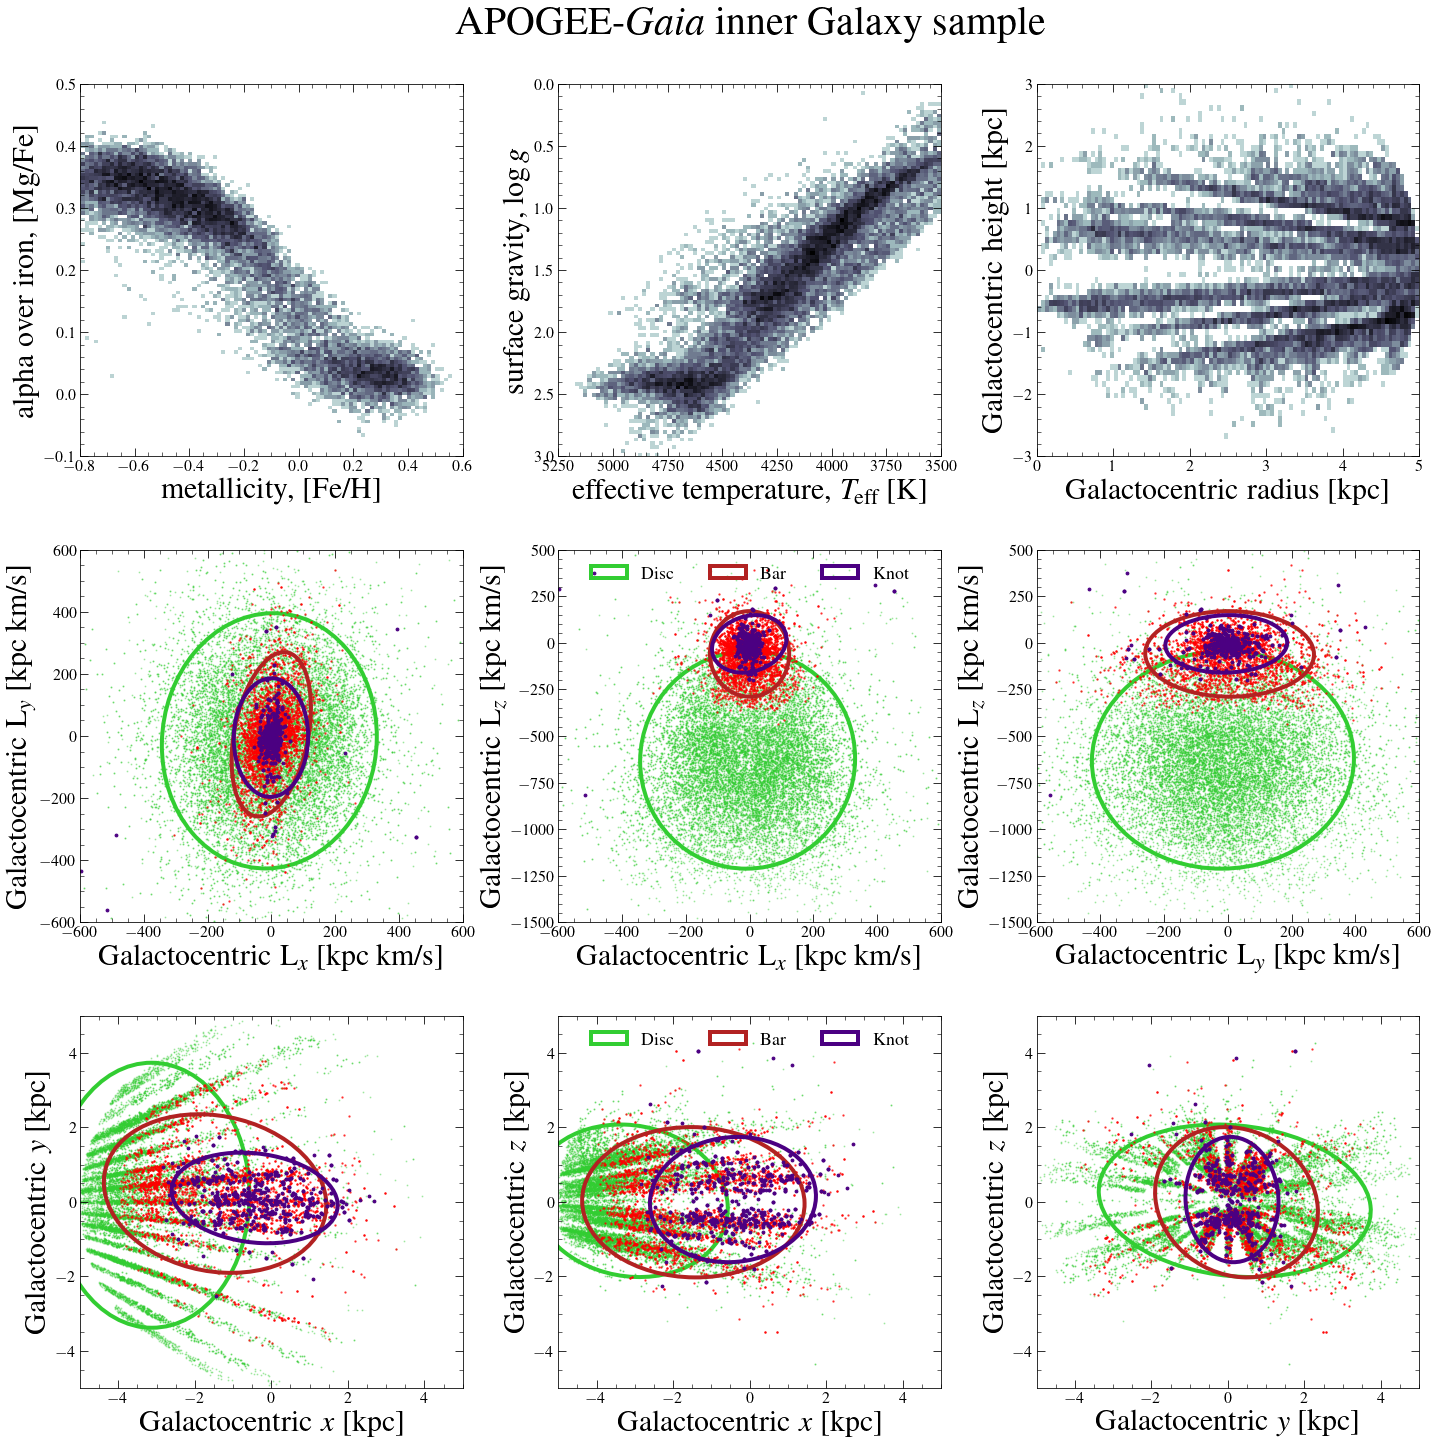

In [27]:
from matplotlib.colors import LogNorm
fig, ax_nstd = plt.subplots(3,3, figsize=(24,24),facecolor='white')

dependency_nstd = [[0.8, 0.75],
                   [-0.2, 0.35]]
mu = 0, 0
scale = 8, 5


# Mg-fe
ax_nstd[0,0].hist2d(data_all['FE_H'][data_all['MG_FE']>-10],data_all['MG_FE'][data_all['MG_FE']>-10],bins=200,cmap='bone_r',norm=LogNorm())
ax_nstd[0,0].set_xlabel(r'metallicity, [Fe/H]',fontsize=30)
ax_nstd[0,0].set_ylabel(r'alpha over iron, [Mg/Fe]',fontsize=30)
ax_nstd[0,0].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
ax_nstd[0,0].tick_params(which='minor', length=4, direction='in',top=True,right=True)
ax_nstd[0,0].minorticks_on()
ax_nstd[0,0].set_xlim(-0.8,0.6)
ax_nstd[0,0].set_ylim(-0.1,0.5)
# cb = ax_nstd[0,0].colorbar(orientation='horizontal',location='top')
# cb.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=20)
# cb.ax.tick_params(labelsize=20)
# cax = axes[0,0].inset_axes([0.15, 1.08, 0.7, 0.05])
# cbar = fig.colorbar(color,orientation='horizontal',location='top')
# cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=30,labelpad=10)
# cbar.ax.tick_params(labelsize=20,pad=1)
# cbar.ax.xaxis.set_ticks_position('top')
# cbar.ax.xaxis.set_label_position('top')


# teff-logg
ax_nstd[0,1].set_title('APOGEE-$Gaia$ inner Galaxy sample',fontsize=40,pad=50)
ax_nstd[0,1].hist2d(data_all['TEFF'][data_all['LOGG']>-10],data_all['LOGG'][data_all['LOGG']>-10],bins=100,cmap='bone_r',norm=LogNorm())
ax_nstd[0,1].set_xlabel(r'effective temperature, $T_{\mathrm{eff}}$ [K]',fontsize=30)
ax_nstd[0,1].set_ylabel(r'surface gravity, $\log g$',fontsize=30)
ax_nstd[0,1].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
ax_nstd[0,1].tick_params(which='minor', length=4, direction='in',top=True,right=True)
ax_nstd[0,1].minorticks_on()
ax_nstd[0,1].set_xlim(5250,3500)
ax_nstd[0,1].set_ylim(3,0.)

# R-z

ax_nstd[0,2].hist2d(Rgal[Zgal>-10],Zgal[Zgal>-10],bins=100,cmap='bone_r',norm=LogNorm())
ax_nstd[0,2].set_xlabel(r'Galactocentric radius [kpc]',fontsize=30)
ax_nstd[0,2].set_ylabel(r'Galactocentric height [kpc]',fontsize=30)
ax_nstd[0,2].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
ax_nstd[0,2].tick_params(which='minor', length=4, direction='in',top=True,right=True)
ax_nstd[0,2].minorticks_on()
ax_nstd[0,2].set_xlim(0.,5)
ax_nstd[0,2].set_ylim(-3,3)



# lx-ly
ax_nstd[1,0].scatter(Lx[mask_disc],Ly[mask_disc],s=1,c='limegreen',alpha=0.3)
# confidence_ellipse(Lxdisc,Lydisc, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='lime',lw=4)
confidence_ellipse(Lx[mask_disc],Ly[mask_disc], ax_nstd[1,0], n_std=2,
                   label=r'$2\sigma$', edgecolor='limegreen',lw=4)
# confidence_ellipse(Lxbar,Lybar, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='tomato',lw=4)
ax_nstd[1,0].scatter(Lx[mask_bar],Ly[mask_bar],s=2,c='r',alpha=0.6)
confidence_ellipse(Lx[mask_bar],Ly[mask_bar], ax_nstd[1,0], n_std=2,
                   label=r'$2\sigma$', edgecolor='firebrick',lw=4)
# confidence_ellipse(Lxknot,Lyknot, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='dodgerblue',lw=4)
ax_nstd[1,0].scatter(Lx[mask_knot],Ly[mask_knot],s=8,c='indigo',alpha=1)
confidence_ellipse(Lx[mask_knot],Ly[mask_knot], ax_nstd[1,0], n_std=2,
                   label=r'$2\sigma$', edgecolor='indigo',lw=4)
ax_nstd[1,0].set_xlabel(r'Galactocentric L$_{x}$ [kpc km/s]',fontsize=30)
ax_nstd[1,0].set_ylabel(r'Galactocentric L$_{y}$ [kpc km/s]',fontsize=30)
ax_nstd[1,0].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
ax_nstd[1,0].tick_params(which='minor', length=4, direction='in',top=True,right=True)
ax_nstd[1,0].minorticks_on()
ax_nstd[1,0].set_xlim(-600,600)
ax_nstd[1,0].set_ylim(-600,600)

# lx-lz
ax_nstd[1,1].scatter(Lx[mask_disc],Lz[mask_disc],s=1,c='limegreen',alpha=0.3)
# confidence_ellipse(Lxdisc,Lydisc, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='lime',lw=4)
confidence_ellipse(Lx[mask_disc],Lz[mask_disc], ax_nstd[1,1], n_std=2,
                   label=r'Disc', edgecolor='limegreen',lw=4)
# confidence_ellipse(Lxbar,Lybar, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='tomato',lw=4)
ax_nstd[1,1].scatter(Lx[mask_bar],Lz[mask_bar],s=2,c='r',alpha=0.6)
confidence_ellipse(Lx[mask_bar],Lz[mask_bar], ax_nstd[1,1], n_std=2,
                   label=r'Bar', edgecolor='firebrick',lw=4)
# confidence_ellipse(Lxknot,Lyknot, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='dodgerblue',lw=4)
ax_nstd[1,1].scatter(Lx[mask_knot],Lz[mask_knot],s=8,c='indigo',alpha=1)
confidence_ellipse(Lx[mask_knot],Lz[mask_knot], ax_nstd[1,1], n_std=2,
                   label=r'Knot', edgecolor='indigo',lw=4)
ax_nstd[1,1].set_xlabel(r'Galactocentric L$_{x}$ [kpc km/s]',fontsize=30)
ax_nstd[1,1].set_ylabel(r'Galactocentric L$_{z}$ [kpc km/s]',fontsize=30)
ax_nstd[1,1].legend(loc='upper center',frameon=False,fontsize=18,ncol=3)
ax_nstd[1,1].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
ax_nstd[1,1].tick_params(which='minor', length=4, direction='in',top=True,right=True)
ax_nstd[1,1].minorticks_on()
ax_nstd[1,1].set_xlim(-600,600)
ax_nstd[1,1].set_ylim(-1500,500)

# ly-lz
ax_nstd[1,2].scatter(Ly[mask_disc],Lz[mask_disc],s=1,c='limegreen',alpha=0.3)
# confidence_ellipse(Lxdisc,Lydisc, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='lime',lw=4)
confidence_ellipse(Ly[mask_disc],Lz[mask_disc], ax_nstd[1,2], n_std=2,
                   label=r'$2\sigma$', edgecolor='limegreen',lw=4)
# confidence_ellipse(Lxbar,Lybar, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='tomato',lw=4)
ax_nstd[1,2].scatter(Ly[mask_bar],Lz[mask_bar],s=2,c='r',alpha=0.6)
confidence_ellipse(Ly[mask_bar],Lz[mask_bar], ax_nstd[1,2], n_std=2,
                   label=r'$2\sigma$', edgecolor='firebrick',lw=4)
# confidence_ellipse(Lxknot,Lyknot, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='dodgerblue',lw=4)
ax_nstd[1,2].scatter(Ly[mask_knot],Lz[mask_knot],s=8,c='indigo',alpha=1)
confidence_ellipse(Ly[mask_knot],Lz[mask_knot], ax_nstd[1,2], n_std=2,
                   label=r'$2\sigma$', edgecolor='indigo',lw=4)
ax_nstd[1,2].set_xlabel(r'Galactocentric L$_{y}$ [kpc km/s]',fontsize=30)
ax_nstd[1,2].set_ylabel(r'Galactocentric L$_{z}$ [kpc km/s]',fontsize=30)
ax_nstd[1,2].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
ax_nstd[1,2].tick_params(which='minor', length=4, direction='in',top=True,right=True)
ax_nstd[1,2].minorticks_on()
ax_nstd[1,2].set_xlim(-600,600)
ax_nstd[1,2].set_ylim(-1500,500)


# x-y
ax_nstd[2,0].scatter(x[mask_disc],y[mask_disc],s=1,c='limegreen',alpha=0.3)
# confidence_ellipse(Lxdisc,Lydisc, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='lime',lw=4)
confidence_ellipse(x[mask_disc],y[mask_disc], ax_nstd[2,0], n_std=2,
                   label=r'$2\sigma$', edgecolor='limegreen',lw=4)
# confidence_ellipse(Lxbar,Lybar, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='tomato',lw=4)
ax_nstd[2,0].scatter(x[mask_bar],y[mask_bar],s=2,c='r',alpha=0.6)
confidence_ellipse(x[mask_bar],y[mask_bar], ax_nstd[2,0], n_std=2,
                   label=r'$2\sigma$', edgecolor='firebrick',lw=4)
# confidence_ellipse(Lxknot,Lyknot, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='dodgerblue',lw=4)
ax_nstd[2,0].scatter(x[mask_knot],y[mask_knot],s=8,c='indigo',alpha=1)
confidence_ellipse(x[mask_knot],y[mask_knot], ax_nstd[2,0], n_std=2,
                   label=r'$2\sigma$', edgecolor='indigo',lw=4)
ax_nstd[2,0].set_xlabel(r'Galactocentric ${x}$ [kpc]',fontsize=30)
ax_nstd[2,0].set_ylabel(r'Galactocentric ${y}$ [kpc]',fontsize=30)
ax_nstd[2,0].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
ax_nstd[2,0].tick_params(which='minor', length=4, direction='in',top=True,right=True)
ax_nstd[2,0].minorticks_on()
ax_nstd[2,0].set_xlim(-5,5)
ax_nstd[2,0].set_ylim(-5,5)

# x-z
ax_nstd[2,1].scatter(x[mask_disc],z[mask_disc],s=1,c='limegreen',alpha=0.3)
# confidence_ellipse(Lxdisc,Lydisc, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='lime',lw=4)
confidence_ellipse(x[mask_disc],z[mask_disc], ax_nstd[2,1], n_std=2,
                   label=r'Disc', edgecolor='limegreen',lw=4)
# confidence_ellipse(Lxbar,Lybar, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='tomato',lw=4)
ax_nstd[2,1].scatter(x[mask_bar],z[mask_bar],s=2,c='r',alpha=0.6)
confidence_ellipse(x[mask_bar],z[mask_bar], ax_nstd[2,1], n_std=2,
                   label=r'Bar', edgecolor='firebrick',lw=4)
# confidence_ellipse(Lxknot,Lyknot, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='dodgerblue',lw=4)
ax_nstd[2,1].scatter(x[mask_knot],z[mask_knot],s=8,c='indigo',alpha=1)
confidence_ellipse(x[mask_knot],z[mask_knot], ax_nstd[2,1], n_std=2,
                   label=r'Knot', edgecolor='indigo',lw=4)
ax_nstd[2,1].set_xlabel(r'Galactocentric ${x}$ [kpc]',fontsize=30)
ax_nstd[2,1].set_ylabel(r'Galactocentric ${z}$ [kpc]',fontsize=30)
ax_nstd[2,1].legend(loc='upper center',frameon=False,fontsize=18,ncol=3)
ax_nstd[2,1].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
ax_nstd[2,1].tick_params(which='minor', length=4, direction='in',top=True,right=True)
ax_nstd[2,1].minorticks_on()
ax_nstd[2,1].set_xlim(-5,5)
ax_nstd[2,1].set_ylim(-5,5)

# y-z
ax_nstd[2,2].scatter(y[mask_disc],z[mask_disc],s=1,c='limegreen',alpha=0.3)
# confidence_ellipse(Lxdisc,Lydisc, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='lime',lw=4)
confidence_ellipse(y[mask_disc],z[mask_disc], ax_nstd[2,2], n_std=2,
                   label=r'$2\sigma$', edgecolor='limegreen',lw=4)
# confidence_ellipse(Lxbar,Lybar, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='tomato',lw=4)
ax_nstd[2,2].scatter(y[mask_bar],z[mask_bar],s=2,c='r',alpha=0.6)
confidence_ellipse(y[mask_bar],z[mask_bar], ax_nstd[2,2], n_std=2,
                   label=r'$2\sigma$', edgecolor='firebrick',lw=4)
# confidence_ellipse(Lxknot,Lyknot, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='dodgerblue',lw=4)
ax_nstd[2,2].scatter(y[mask_knot],z[mask_knot],s=8,c='indigo',alpha=1)
confidence_ellipse(y[mask_knot],z[mask_knot], ax_nstd[2,2], n_std=2,
                   label=r'$2\sigma$', edgecolor='indigo',lw=4)
ax_nstd[2,2].set_xlabel(r'Galactocentric ${y}$ [kpc]',fontsize=30)
ax_nstd[2,2].set_ylabel(r'Galactocentric ${z}$ [kpc]',fontsize=30)
ax_nstd[2,2].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
ax_nstd[2,2].tick_params(which='minor', length=4, direction='in',top=True,right=True)
ax_nstd[2,2].minorticks_on()
ax_nstd[2,2].set_xlim(-5,5)
ax_nstd[2,2].set_ylim(-5,5)

plt.subplots_adjust(wspace=0.25,hspace=0.25)
# plt.savefig('../plots-paper/summary.pdf',dpi=600,fmt='pdf', rasterized=True)
plt.show()


In [28]:
path = '/Users/dhortadarrington/Documents/Projects/mw-bar/data/table_centroids.fits'
tb = fits.open(path)
data = tb[1].data 

In [29]:
mask_disc_cen = np.where(data['comp']=='disc')
mask_knot_cen = np.where(data['comp']=='knot')
mask_bar_cen = np.where(data['comp']=='bar')

In [30]:
lx_cen = data['Lx']
lx_std_cen = (data['Lx+']-data['Lx-'])/2
ly_cen = data['Ly']
lz_cen = data['Lz']


In [31]:
mask_knot = (np.array(median_knot_probability)>0.5)&(np.array(std_knot_probability)<0.05 )
mask_bar = (np.array(median_bar_probability)>0.8)&(np.array(std_bar_probability)<0.1 )
mask_disc = (np.array(median_disc_probability)>0.8)&(np.array(std_disc_probability)<0.1)

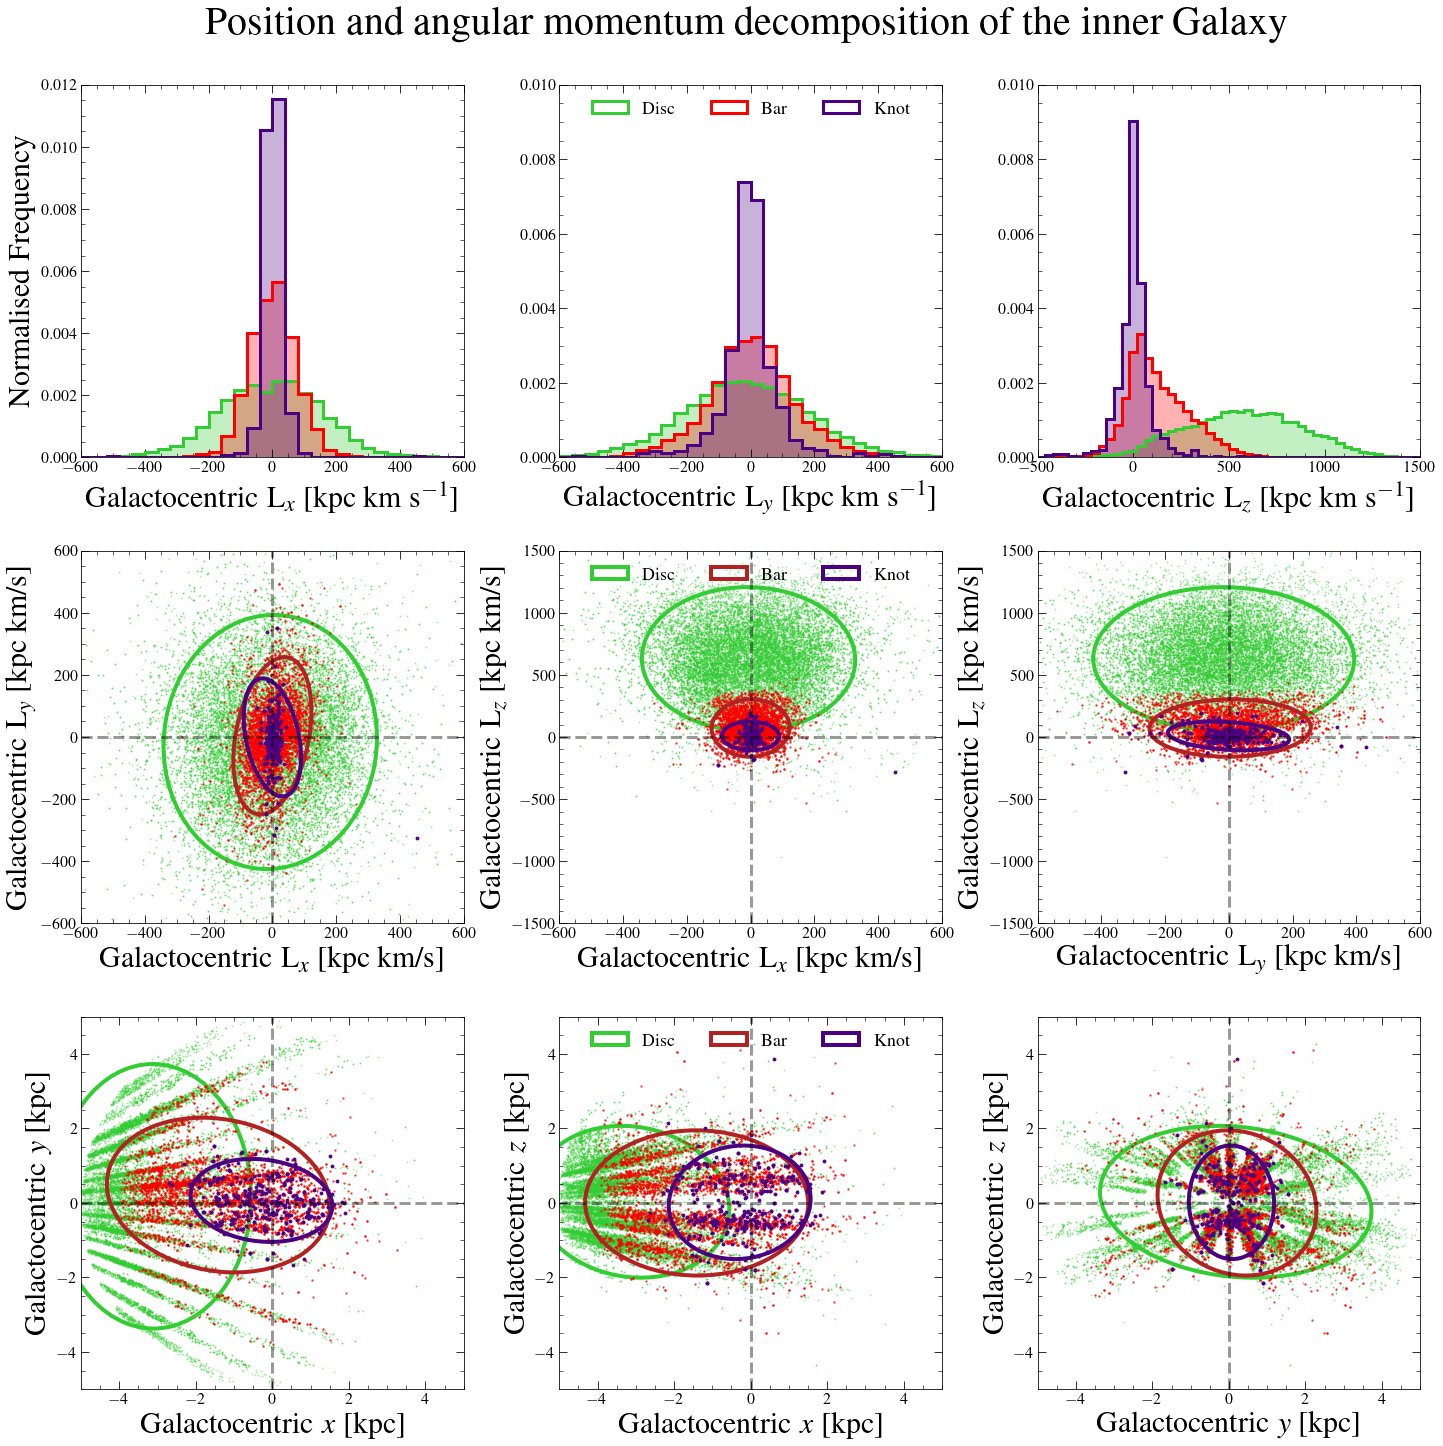

In [32]:
from matplotlib.colors import LogNorm
fig, ax_nstd = plt.subplots(3,3, figsize=(24,24),facecolor='white')
fig.suptitle('Position and angular momentum decomposition of the inner Galaxy',fontsize=40,x=0.51,y=0.925)

dependency_nstd = [[0.8, 0.75],
                   [-0.2, 0.35]]
mu = 0, 0
scale = 8, 5

# plt.hist(Lx_todo[mask_solar],bins=np.linspace(-600,600,51),color='darkorange',histtype='step',lw=3,density=True,label='Disc (Solar)')
# plt.hist(Lx_todo[mask_solar],bins=np.linspace(-600,600,51),color='darkorange',alpha=0.3,density=True)
ax_nstd[0,0].hist(Lx,bins=np.linspace(-600,600,31),weights=np.array(median_disc_probability),color='limegreen',histtype='step',lw=3,label='Disc',density=True)
ax_nstd[0,0].hist(Lx,bins=np.linspace(-600,600,31),weights=np.array(median_disc_probability),color='limegreen',alpha=0.3,density=True)
ax_nstd[0,0].hist(Lx,bins=np.linspace(-600,600,31),weights=np.array(median_bar_probability),color='r',histtype='step',lw=3,label='Bar',density=True)
ax_nstd[0,0].hist(Lx,bins=np.linspace(-600,600,31),weights=np.array(median_bar_probability),color='r',alpha=0.3,density=True)
ax_nstd[0,0].hist(Lx,bins=np.linspace(-600,600,31),weights=np.array(median_knot_probability),color='indigo',histtype='step',lw=3,label='Knot',density=True)
ax_nstd[0,0].hist(Lx,bins=np.linspace(-600,600,31),weights=np.array(median_knot_probability),color='indigo',alpha=0.3,density=True)
ax_nstd[0,0].set_xlabel(r'Galactocentric L$_{x}$ [kpc km s$^{-1}$]',fontsize=30,labelpad=5)
#ax_nstd[0,0]plt.legend(loc='upper left',fontsize=18,frameon=False)
ax_nstd[0,0].set_ylabel(r'Normalised Frequency',fontsize=30,labelpad=5)
ax_nstd[0,0].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
ax_nstd[0,0].tick_params(which='minor', length=4, direction='in',top=True,right=True)
ax_nstd[0,0].minorticks_on()
ax_nstd[0,0].set_xlim(-600,600)
ax_nstd[0,0].set_ylim(0,0.012)


# plt.hist(Lx_todo[mask_solar],bins=np.linspace(-600,600,51),color='darkorange',histtype='step',lw=3,density=True,label='Disc (Solar)')
# plt.hist(Lx_todo[mask_solar],bins=np.linspace(-600,600,51),color='darkorange',alpha=0.3,density=True)
ax_nstd[0,1].hist(Ly,bins=np.linspace(-600,600,31),weights=np.array(median_disc_probability),color='limegreen',alpha=0.3,density=True)
ax_nstd[0,1].hist(Ly,bins=np.linspace(-600,600,31),weights=np.array(median_disc_probability),color='limegreen',histtype='step',lw=3,label='Disc',density=True)
ax_nstd[0,1].hist(Ly,bins=np.linspace(-600,600,31),weights=np.array(median_bar_probability),color='r',histtype='step',lw=3,label='Bar',density=True)
ax_nstd[0,1].hist(Ly,bins=np.linspace(-600,600,31),weights=np.array(median_bar_probability),color='r',alpha=0.3,density=True)
ax_nstd[0,1].hist(Ly,bins=np.linspace(-600,600,31),weights=np.array(median_knot_probability),color='indigo',histtype='step',lw=3,label='Knot',density=True)
ax_nstd[0,1].hist(Ly,bins=np.linspace(-600,600,31),weights=np.array(median_knot_probability),color='indigo',alpha=0.3,density=True)
ax_nstd[0,1].set_xlabel(r'Galactocentric L$_{y}$ [kpc km s$^{-1}$]',fontsize=30,labelpad=5)
ax_nstd[0,1].legend(loc='upper center',frameon=False,fontsize=18,ncol=3)
# plt.ylabel(r'Normalised Frequency',fontsize=25)
ax_nstd[0,1].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
ax_nstd[0,1].tick_params(which='minor', length=4, direction='in',top=True,right=True)
ax_nstd[0,1].minorticks_on()
ax_nstd[0,1].set_xlim(-600,600)
ax_nstd[0,1].set_ylim(0,0.01)


# plt.hist(Lx_todo[mask_solar],bins=np.linspace(-600,600,51),color='darkorange',histtype='step',lw=3,density=True,label='Disc (Solar)')
# plt.hist(Lx_todo[mask_solar],bins=np.linspace(-600,600,51),color='darkorange',alpha=0.3,density=True)
ax_nstd[0,2].hist(-Lz,bins=np.linspace(-500,1500,51),weights=np.array(median_disc_probability),color='limegreen',histtype='step',lw=3,label='Disc',density=True)
ax_nstd[0,2].hist(-Lz,bins=np.linspace(-500,1500,51),weights=np.array(median_disc_probability),color='limegreen',alpha=0.3,density=True)
ax_nstd[0,2].hist(-Lz,bins=np.linspace(-500,1500,51),weights=np.array(median_bar_probability),color='r',alpha=0.3,density=True)
ax_nstd[0,2].hist(-Lz,bins=np.linspace(-500,1500,51),weights=np.array(median_bar_probability),color='r',histtype='step',lw=3,label='Bar',density=True)
ax_nstd[0,2].set_xlabel(r'Galactocentric L$_{z}$ [kpc km s$^{-1}$]',fontsize=30,labelpad=5)
ax_nstd[0,2].hist(-Ly,bins=np.linspace(-500,1500,51),weights=np.array(median_knot_probability),color='indigo',histtype='step',lw=3,label='Knot',density=True)
ax_nstd[0,2].hist(-Ly,bins=np.linspace(-500,1500,51),weights=np.array(median_knot_probability),color='indigo',alpha=0.3,density=True)
# plt.legend(loc='upper right',fontsize=18,frameon=False)
# plt.ylabel(r'Normalised Frequency',fontsize=25)
ax_nstd[0,2].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
ax_nstd[0,2].tick_params(which='minor', length=4, direction='in',top=True,right=True)
ax_nstd[0,2].minorticks_on()
ax_nstd[0,2].set_xlim(-500,1500)
ax_nstd[0,2].set_ylim(0,0.01)

# lx-ly
ax_nstd[1,0].vlines(0,-600,600,ls='dashed',lw=3,color='k',alpha=0.4)
ax_nstd[1,0].hlines(0,-600,600,ls='dashed',lw=3,color='k',alpha=0.4)
ax_nstd[1,0].scatter(Lx[mask_disc],Ly[mask_disc],s=1,c='limegreen',alpha=0.3)
# confidence_ellipse(Lxdisc,Lydisc, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='lime',lw=4)
confidence_ellipse(Lx[mask_disc],Ly[mask_disc], ax_nstd[1,0], n_std=2,
                   label=r'$2\sigma$', edgecolor='limegreen',lw=4)
# confidence_ellipse(Lxbar,Lybar, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='tomato',lw=4)
ax_nstd[1,0].scatter(Lx[mask_bar],Ly[mask_bar],s=2,c='r',alpha=0.6)
confidence_ellipse(Lx[mask_bar],Ly[mask_bar], ax_nstd[1,0], n_std=2,
                   label=r'$2\sigma$', edgecolor='firebrick',lw=4)
# confidence_ellipse(Lxknot,Lyknot, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='dodgerblue',lw=4)
ax_nstd[1,0].scatter(Lx[mask_knot],Ly[mask_knot],s=8,c='indigo',alpha=1)
confidence_ellipse(Lx[mask_knot],Ly[mask_knot], ax_nstd[1,0], n_std=2,
                   label=r'$2\sigma$', edgecolor='indigo',lw=4)
ax_nstd[1,0].set_xlabel(r'Galactocentric L$_{x}$ [kpc km/s]',fontsize=30,labelpad=5)
ax_nstd[1,0].set_ylabel(r'Galactocentric L$_{y}$ [kpc km/s]',fontsize=30,labelpad=5)
ax_nstd[1,0].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
ax_nstd[1,0].tick_params(which='minor', length=4, direction='in',top=True,right=True)
ax_nstd[1,0].minorticks_on()
ax_nstd[1,0].set_xlim(-600,600)
ax_nstd[1,0].set_ylim(-600,600)


# lx-lz
ax_nstd[1,1].vlines(0,-1500,1500,ls='dashed',lw=3,color='k',alpha=0.4)
ax_nstd[1,1].hlines(0,-600,600,ls='dashed',lw=3,color='k',alpha=0.4)
ax_nstd[1,1].scatter(Lx[mask_disc],-Lz[mask_disc],s=1,c='limegreen',alpha=0.3)
# confidence_ellipse(Lxdisc,Lydisc, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='lime',lw=4)
confidence_ellipse(Lx[mask_disc],-Lz[mask_disc], ax_nstd[1,1], n_std=2,
                   label=r'Disc', edgecolor='limegreen',lw=4)
# confidence_ellipse(Lxbar,Lybar, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='tomato',lw=4)
ax_nstd[1,1].scatter(Lx[mask_bar],-Lz[mask_bar],s=2,c='r',alpha=0.6)
confidence_ellipse(Lx[mask_bar],-Lz[mask_bar], ax_nstd[1,1], n_std=2,
                   label=r'Bar', edgecolor='firebrick',lw=4)
# confidence_ellipse(Lxknot,Lyknot, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='dodgerblue',lw=4)
ax_nstd[1,1].scatter(Lx[mask_knot],-Lz[mask_knot],s=8,c='indigo',alpha=1)
confidence_ellipse(Lx[mask_knot],-Lz[mask_knot], ax_nstd[1,1], n_std=2,
                   label=r'Knot', edgecolor='indigo',lw=4)
ax_nstd[1,1].set_xlabel(r'Galactocentric L$_{x}$ [kpc km/s]',fontsize=30,labelpad=5)
ax_nstd[1,1].set_ylabel(r'Galactocentric L$_{z}$ [kpc km/s]',fontsize=30,labelpad=5)
ax_nstd[1,1].legend(loc='upper center',frameon=False,fontsize=18,ncol=3)
ax_nstd[1,1].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
ax_nstd[1,1].tick_params(which='minor', length=4, direction='in',top=True,right=True)
ax_nstd[1,1].minorticks_on()
ax_nstd[1,1].set_xlim(-600,600)
ax_nstd[1,1].set_ylim(-1500,1500)

# ly-lz
ax_nstd[1,2].vlines(0,-1500,1500,ls='dashed',lw=3,color='k',alpha=0.4)
ax_nstd[1,2].hlines(0,-600,600,ls='dashed',lw=3,color='k',alpha=0.4)
ax_nstd[1,2].scatter(Ly[mask_disc],-Lz[mask_disc],s=1,c='limegreen',alpha=0.3)
# confidence_ellipse(Lxdisc,Lydisc, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='lime',lw=4)
confidence_ellipse(Ly[mask_disc],-Lz[mask_disc], ax_nstd[1,2], n_std=2,
                   label=r'$2\sigma$', edgecolor='limegreen',lw=4)
# confidence_ellipse(Lxbar,Lybar, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='tomato',lw=4)
ax_nstd[1,2].scatter(Ly[mask_bar],-Lz[mask_bar],s=2,c='r',alpha=0.6)
confidence_ellipse(Ly[mask_bar],-Lz[mask_bar], ax_nstd[1,2], n_std=2,
                   label=r'$2\sigma$', edgecolor='firebrick',lw=4)
# confidence_ellipse(Lxknot,Lyknot, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='dodgerblue',lw=4)
ax_nstd[1,2].scatter(Ly[mask_knot],-Lz[mask_knot],s=8,c='indigo',alpha=1)
confidence_ellipse(Ly[mask_knot],-Lz[mask_knot], ax_nstd[1,2], n_std=2,
                   label=r'$2\sigma$', edgecolor='indigo',lw=4)
ax_nstd[1,2].set_xlabel(r'Galactocentric L$_{y}$ [kpc km/s]',fontsize=30,labelpad=5)
ax_nstd[1,2].set_ylabel(r'Galactocentric L$_{z}$ [kpc km/s]',fontsize=30,labelpad=5)
ax_nstd[1,2].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
ax_nstd[1,2].tick_params(which='minor', length=4, direction='in',top=True,right=True)
ax_nstd[1,2].minorticks_on()
ax_nstd[1,2].set_xlim(-600,600)
ax_nstd[1,2].set_ylim(-1500,1500)


# x-y
ax_nstd[2,0].vlines(0,-5,5,ls='dashed',lw=3,color='k',alpha=0.4)
ax_nstd[2,0].hlines(0,-5,5,ls='dashed',lw=3,color='k',alpha=0.4)
ax_nstd[2,0].scatter(x[mask_disc],y[mask_disc],s=1,c='limegreen',alpha=0.3)
# confidence_ellipse(Lxdisc,Lydisc, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='lime',lw=4)
confidence_ellipse(x[mask_disc],y[mask_disc], ax_nstd[2,0], n_std=2,
                   label=r'$2\sigma$', edgecolor='limegreen',lw=4)
# confidence_ellipse(Lxbar,Lybar, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='tomato',lw=4)
ax_nstd[2,0].scatter(x[mask_bar],y[mask_bar],s=2,c='r',alpha=0.6)
confidence_ellipse(x[mask_bar],y[mask_bar], ax_nstd[2,0], n_std=2,
                   label=r'$2\sigma$', edgecolor='firebrick',lw=4)
# confidence_ellipse(Lxknot,Lyknot, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='dodgerblue',lw=4)
ax_nstd[2,0].scatter(x[mask_knot],y[mask_knot],s=8,c='indigo',alpha=1)
confidence_ellipse(x[mask_knot],y[mask_knot], ax_nstd[2,0], n_std=2,
                   label=r'$2\sigma$', edgecolor='indigo',lw=4)
ax_nstd[2,0].set_xlabel(r'Galactocentric ${x}$ [kpc]',fontsize=30,labelpad=5)
ax_nstd[2,0].set_ylabel(r'Galactocentric ${y}$ [kpc]',fontsize=30,labelpad=5)
ax_nstd[2,0].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
ax_nstd[2,0].tick_params(which='minor', length=4, direction='in',top=True,right=True)
ax_nstd[2,0].minorticks_on()
ax_nstd[2,0].set_xlim(-5,5)
ax_nstd[2,0].set_ylim(-5,5)

# x-z
ax_nstd[2,1].vlines(0,-5,5,ls='dashed',lw=3,color='k',alpha=0.4)
ax_nstd[2,1].hlines(0,-5,5,ls='dashed',lw=3,color='k',alpha=0.4)
ax_nstd[2,1].scatter(x[mask_disc],z[mask_disc],s=1,c='limegreen',alpha=0.3)
# confidence_ellipse(Lxdisc,Lydisc, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='lime',lw=4)
confidence_ellipse(x[mask_disc],z[mask_disc], ax_nstd[2,1], n_std=2,
                   label=r'Disc', edgecolor='limegreen',lw=4)
# confidence_ellipse(Lxbar,Lybar, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='tomato',lw=4)
ax_nstd[2,1].scatter(x[mask_bar],z[mask_bar],s=2,c='r',alpha=0.6)
confidence_ellipse(x[mask_bar],z[mask_bar], ax_nstd[2,1], n_std=2,
                   label=r'Bar', edgecolor='firebrick',lw=4)
# confidence_ellipse(Lxknot,Lyknot, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='dodgerblue',lw=4)
ax_nstd[2,1].scatter(x[mask_knot],z[mask_knot],s=8,c='indigo',alpha=1)
confidence_ellipse(x[mask_knot],z[mask_knot], ax_nstd[2,1], n_std=2,
                   label=r'Knot', edgecolor='indigo',lw=4)
ax_nstd[2,1].set_xlabel(r'Galactocentric ${x}$ [kpc]',fontsize=30,labelpad=5)
ax_nstd[2,1].set_ylabel(r'Galactocentric ${z}$ [kpc]',fontsize=30,labelpad=5)
ax_nstd[2,1].legend(loc='upper center',frameon=False,fontsize=18,ncol=3)
ax_nstd[2,1].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
ax_nstd[2,1].tick_params(which='minor', length=4, direction='in',top=True,right=True)
ax_nstd[2,1].minorticks_on()
ax_nstd[2,1].set_xlim(-5,5)
ax_nstd[2,1].set_ylim(-5,5)

# y-z
ax_nstd[2,2].vlines(0,-5,5,ls='dashed',lw=3,color='k',alpha=0.4)
ax_nstd[2,2].hlines(0,-5,5,ls='dashed',lw=3,color='k',alpha=0.4)
ax_nstd[2,2].scatter(y[mask_disc],z[mask_disc],s=1,c='limegreen',alpha=0.3)
# confidence_ellipse(Lxdisc,Lydisc, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='lime',lw=4)
confidence_ellipse(y[mask_disc],z[mask_disc], ax_nstd[2,2], n_std=2,
                   label=r'$2\sigma$', edgecolor='limegreen',lw=4)
# confidence_ellipse(Lxbar,Lybar, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='tomato',lw=4)
ax_nstd[2,2].scatter(y[mask_bar],z[mask_bar],s=2,c='r',alpha=0.6)
confidence_ellipse(y[mask_bar],z[mask_bar], ax_nstd[2,2], n_std=2,
                   label=r'$2\sigma$', edgecolor='firebrick',lw=4)
# confidence_ellipse(Lxknot,Lyknot, ax_nstd[0], n_std=1,
#                    label=r'$1\sigma$', edgecolor='dodgerblue',lw=4)
ax_nstd[2,2].scatter(y[mask_knot],z[mask_knot],s=8,c='indigo',alpha=1)
confidence_ellipse(y[mask_knot],z[mask_knot], ax_nstd[2,2], n_std=2,
                   label=r'$2\sigma$', edgecolor='indigo',lw=4)
ax_nstd[2,2].set_xlabel(r'Galactocentric ${y}$ [kpc]',fontsize=30,labelpad=5)
ax_nstd[2,2].set_ylabel(r'Galactocentric ${z}$ [kpc]',fontsize=30,labelpad=5)
ax_nstd[2,2].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
ax_nstd[2,2].tick_params(which='minor', length=4, direction='in',top=True,right=True)
ax_nstd[2,2].minorticks_on()
ax_nstd[2,2].set_xlim(-5,5)
ax_nstd[2,2].set_ylim(-5,5)

plt.subplots_adjust(wspace=0.25,hspace=0.25)
# plt.savefig('../plots-paper/summary.pdf',dpi=600,fmt='pdf', rasterized=True, bbox_inches = 'tight')
plt.show()


(-3.0, 3.0)

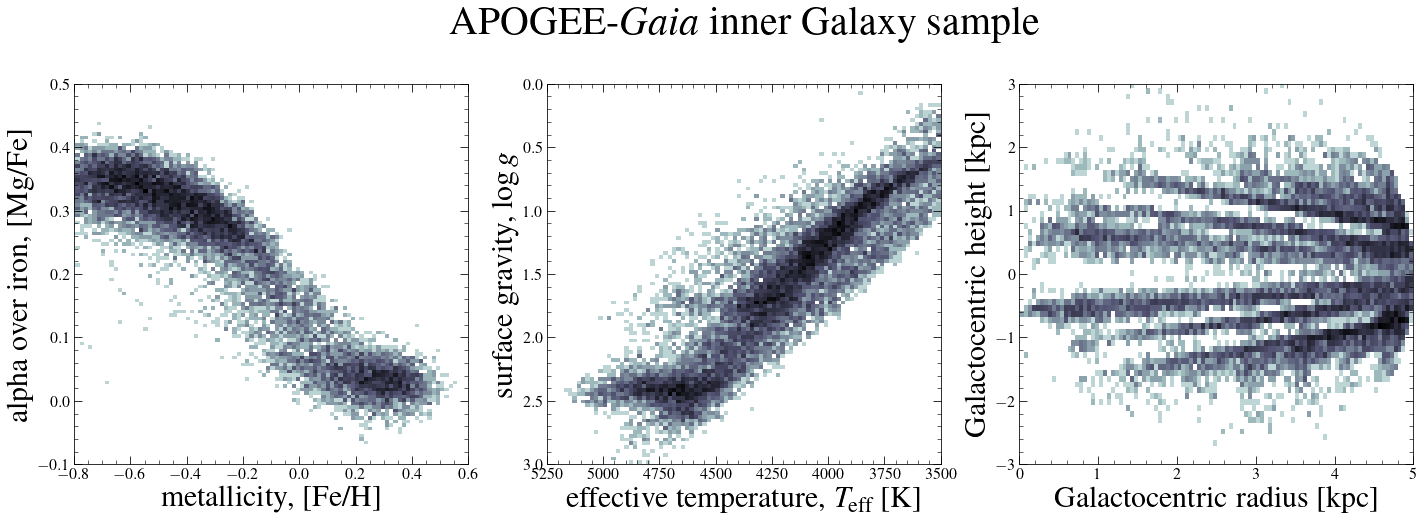

In [33]:
from matplotlib.colors import LogNorm
fig, ax_nstd = plt.subplots(1,3, figsize=(24,7),facecolor='white')

dependency_nstd = [[0.8, 0.75],
                   [-0.2, 0.35]]
mu = 0, 0
scale = 8, 5


# Mg-fe
ax_nstd[0].hist2d(data_all['FE_H'][data_all['MG_FE']>-10],data_all['MG_FE'][data_all['MG_FE']>-10],bins=200,cmap='bone_r',norm=LogNorm())
ax_nstd[0].set_xlabel(r'metallicity, [Fe/H]',fontsize=30)
ax_nstd[0].set_ylabel(r'alpha over iron, [Mg/Fe]',fontsize=30)
ax_nstd[0].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
ax_nstd[0].tick_params(which='minor', length=4, direction='in',top=True,right=True)
ax_nstd[0].minorticks_on()
ax_nstd[0].set_xlim(-0.8,0.6)
ax_nstd[0].set_ylim(-0.1,0.5)
# cb = ax_nstd[0,0].colorbar(orientation='horizontal',location='top')
# cb.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=20)
# cb.ax.tick_params(labelsize=20)
# cax = axes[0,0].inset_axes([0.15, 1.08, 0.7, 0.05])
# cbar = fig.colorbar(color,orientation='horizontal',location='top')
# cbar.set_label(label=r'N$_{\mathrm{stars}}$',fontsize=30,labelpad=10)
# cbar.ax.tick_params(labelsize=20,pad=1)
# cbar.ax.xaxis.set_ticks_position('top')
# cbar.ax.xaxis.set_label_position('top')


# teff-logg
ax_nstd[1].set_title('APOGEE-$Gaia$ inner Galaxy sample',fontsize=40,pad=50)
ax_nstd[1].hist2d(data_all['TEFF'][data_all['LOGG']>-10],data_all['LOGG'][data_all['LOGG']>-10],bins=100,cmap='bone_r',norm=LogNorm())
ax_nstd[1].set_xlabel(r'effective temperature, $T_{\mathrm{eff}}$ [K]',fontsize=30)
ax_nstd[1].set_ylabel(r'surface gravity, $\log g$',fontsize=30)
ax_nstd[1].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
ax_nstd[1].tick_params(which='minor', length=4, direction='in',top=True,right=True)
ax_nstd[1].minorticks_on()
ax_nstd[1].set_xlim(5250,3500)
ax_nstd[1].set_ylim(3,0.)

# R-z

ax_nstd[2].hist2d(Rgal[Zgal>-10],Zgal[Zgal>-10],bins=100,cmap='bone_r',norm=LogNorm())
ax_nstd[2].set_xlabel(r'Galactocentric radius [kpc]',fontsize=30)
ax_nstd[2].set_ylabel(r'Galactocentric height [kpc]',fontsize=30)
ax_nstd[2].tick_params(which='major',labelsize=16,direction='in',top=True,right=True,length=8)
ax_nstd[2].tick_params(which='minor', length=4, direction='in',top=True,right=True)
ax_nstd[2].minorticks_on()
ax_nstd[2].set_xlim(0.,5)
ax_nstd[2].set_ylim(-3,3)

# plt.savefig('../plots-paper/data.pdf',dpi=600,fmt='pdf', rasterized=True, bbox_inches = 'tight')


